# Aritmetica Modulare e Crittografia RSA con SAGE

Scopo di questi esempi è utilizzare SAGE per risolvere qualche esercizio con l'**aritmetica modulare**. Come avete visto - in grande dettaglio - nel corso di *Aritmetica*, l'aritmetica modulare si basa sul concetto di **congruenza modulo** $n$. Per richiamarlo alla memoria, dati tre numeri interi $a$, $b$, $n$, con $n \neq 0$, diciamo che $a$ e $b$ sono congruenti modulo $n$, oppure che $a$ è congruo a $b$ modulo $n$, se la differenza $(a - b)$ è un multiplo di $n$ e scriviamo 
$$ a \equiv b \,(\text{mod}\,n).$$
Indichiamo inoltre l'**anello** degli interni modulo $n$ come $\mathbb{Z}/n\mathbb{Z}$. 

## Aritmetica modulare

SAGE ci permette di effettuare operazioni in questo anello in maniera piuttosto semplice, consideriamo il seguente esempio in cui facciamo delle operazioni *modulo* $12$. Definiamo come prima cosa l'anello $R = \mathbb{Z}/12\mathbb{Z}$ degli interi modulo 12:

In [1]:
R = IntegerModRing(12)

Possiamo ora costruire le nostre operazioni tra gli elementi di questo anello nel seguente modo:

In [2]:
R(5)*R(10)

2

da cui abbiamo effettivamente ottenuto rapidamente che $$[5]_{12} [10]_{12} = [50]_{12} = [4\times12 + 2]_{12} = [2]_{12}.$$

Più in generale possiamo usare SAGE per costruire la tabella molitplicativa di tutto l'anello:

In [11]:
n = 12
R = IntegerModRing(n)
rows = [['*']+[str(r) for r in R]]+[[i]+[i*r for r in R] for i in R]
table(rows)

*    0   1    2    3   4   5    6   7    8   9   10   11
  0    0   0    0    0   0   0    0   0    0   0   0    0
  1    0   1    2    3   4   5    6   7    8   9   10   11
  2    0   2    4    6   8   10   0   2    4   6   8    10
  3    0   3    6    9   0   3    6   9    0   3   6    9
  4    0   4    8    0   4   8    0   4    8   0   4    8
  5    0   5    10   3   8   1    6   11   4   9   2    7
  6    0   6    0    6   0   6    0   6    0   6   0    6
  7    0   7    2    9   4   11   6   1    8   3   10   5
  8    0   8    4    0   8   4    0   8    4   0   8    4
  9    0   9    6    3   0   9    6   3    0   9   6    3
  10   0   10   8    6   4   2    0   10   8   6   4    2
  11   0   11   10   9   8   7    6   5    4   3   2    1

Possiamo usare SAGE anche per costruire delle rappresentazioni diagrammatiche della riduzione $(\text{mod}\,n)$ sfruttando alcune opzioni per i grafi. Ad **esempio**, fissiamo $n$ il nodulo. Settiamo la variabile $a$ al valore di qualche intero e usiamo SAGE per costruire un diagramma della funzione $x \mapsto a x$ sull'anello $\mathbb{Z}/n\mathbb{Z}$:

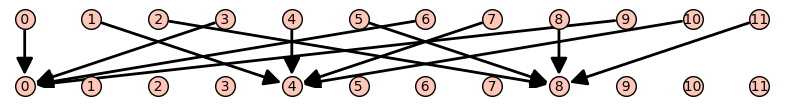

In [15]:
n = 12
a = 4
R = IntegerModRing(n)
left=[' '+str(r)+' ' for r in R]
right=['  '+str(r)+'  ' for r in R]
pre_pos=graphs.CompleteBipartiteGraph(len(left),len(right)).get_pos()
G = DiGraph() 
pos={}
for (i,v) in enumerate(left+right):
    G.add_vertex(v)
    pos[v]=pre_pos[i]
for l in range(n):
    G.add_edge(left[l],right[lift(R(a*l))])
G.plot(pos=pos)

<div class="alert alert-block alert-success">
<strong>Esercizio:</strong> Potete provare a modificare il codice precedente per produrre un grafico analogo per la funzione $x \mapsto x^a$.
</div>

## Alcune funzioni collegate

Possiamo compiere un certo numero di altre operazioni legate alla *teoria dei numeri* mediante SAGE. Ad **esempio**, possiamo calcolare con semplicità il GCD di due numeri con l'apposita funzione:

In [3]:
gcd(12,8)

4

oppure chiedere che ci sia restituita l'identità di Bezout associata al GCD che abbiamo chiesto:

In [4]:
d,u,v = xgcd(12,8)
print(d == u*12 + v*8)
print(d)
print(u)
print(v)

True
4
1
-1


Altre operazioni interessanti sono la **fattorizzazione** di numeri interi:

In [5]:
factor(17263)

61 * 283

Piuttosto che il calcolo della *funzione totiene* di Eulero - che ricordiamo essere la funzione che ha come valore la cardinalità del gruppo moltiplicativo degli interi di modulo $n$, ovvero - più precisamente - l'ordine del gruppo moltiplicativo dell'anello $\mathbb{Z}/n\mathbb{Z}$.

In [6]:
euler_phi(25)

20

Di cui ad esempio potremmo voler anche generare un grafico. Per farlo sfruttiamo la combinazione di una funzione di plot di SAGE `list_plot` e di un modo di creare una lista di oggetti. Quello che vogliamo stampare è il valore di $\phi(i)$ per $i=1,\ldots,100$, quindi per prima cosa creiamo una struttura con questi valori:

In [7]:
valphi = [euler_phi(i) for i in range(100)]

e poi la passiamo a `list_plot` per generare il grafico:

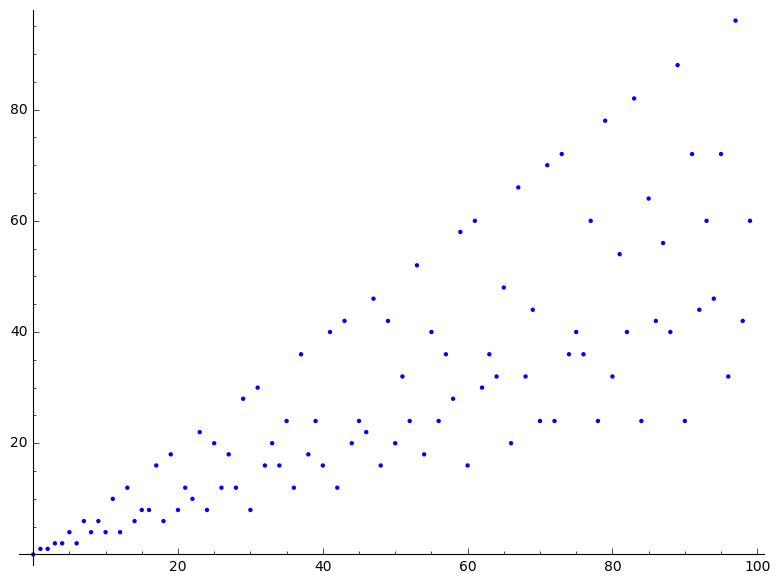

In [8]:
list_plot(valphi)

Per concludere con una delle applicazioni classiche di questi oggetti che è il **Teorema Cinese dei Resti**, ricordiamo che il teorema cinese del resto afferma che se si conoscono i resti della divisione euclidea di un intero $n$ per più interi, allora si può determinare in modo univoco il resto della divisione di $n$ per il prodotto di questi interi, *a condizione che* i divisori siano a due a due coprimi.

Cerchiamo quindi di risolvere la coppia di congruenze lineari:

$$ x \equiv a \,(\text{mod}\,m) \\ x \equiv b \,(\text{mod}\,n) $$

In [9]:
a = 13; 
b = 20; 
m = 100; 
n = 301;
x = crt(a,b,m,n); print(x)

28013


Che possiamo verificare facendo:

In [10]:
print(x % m == a)
print(x % n == b)

True
True


### L'Anello dei Polinomi

Quello degli interi modulo $n$ non è l'unico anello con cui possiamo lavorare in SAGE. Un altro esempio classico dell'algebra di base è rappresentato dall'anello dei polinomi a coefficienti in un campo. Possiamo costruire ad esempio l'anello dei polinomi a coefficienti in $\mathbb{Q}$ come:

In [17]:
P = PolynomialRing(QQ, 't')
print(P)

Univariate Polynomial Ring in t over Rational Field


Oppure lanciarci in operazioni più ardite, come considerare l'anello dei polinomi a coefficienti in un anello $\mathbb{Z}/n\mathbb{Z}$:

In [19]:
R = IntegerModRing(7);
Pn = PolynomialRing(R,'x');
print(Pn)

Univariate Polynomial Ring in x over Ring of integers modulo 7


Costruire due polinomi in questo nuovo oggetto e fare delle operazioni tra di essi:

In [28]:
x = Pn.0
p1 = 3*x^3 + 5*x + 2
p2 = 6*x^6 + 4*x + 1
print(p1)
print(p2)
print(p1*p2)

3*x^3 + 5*x + 2
6*x^6 + 4*x + 1
4*x^9 + 2*x^7 + 5*x^6 + 5*x^4 + 3*x^3 + 6*x^2 + 6*x + 2


come calcolare l'identità di Bezout tra due di questi oggetti:

In [31]:
d,u,v = xgcd(p1,p2)
print(d)
print(u)
print(v)

1
4*x^5 + 5*x^4 + 4*x^3 + 3*x^2 + 4*x + 2
5*x^2 + x + 4


## La Crittografia RSA

Ricordiamo in breve il funzionamento dell'algoritmo di cifratura RSA. 

Un intero positivo $n > 1$ è detto **primo** se gli unici suoi fattori sono $1$ e $n$ stesso. In SAGE possiamo ottenere, ad *esempio*, i primi 20 primi con il comando `primes_first_n`:

In [32]:
primes_first_n(20)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]

La **crittografia** è la scienza di nascondere i messaggi agli occhi e le orecchie di chi non deve venirne a conoscenza. Immaginiamo di scrivere un'e-mail riservata a qualcuno. Dopo aver scritto l'e-mail, possiamo inviarla in due modi. 
1. Il primo, e di solito conveniente, è semplicemente premere il pulsante di invio e non preoccuparsi di come verrà consegnata la nostra email. Inviare un'e-mail in questo modo è simile a scrivere il nostro messaggio confidenziale su una cartolina e spedirlo senza racchiudere la nostra cartolina all'interno di una busta. Chiunque possa accedere alla nostra cartolina può vedere il nostro messaggio. 
2. Il secondo, prima di inviare la nostra e-mail, possiamo criptare il messaggio riservato e quindi premere il pulsante di invio. Rimescolando il nostro messaggio è simile a racchiudere la nostra cartolina all'interno di una busta. Sebbene non sia sicuro al 100%, almeno sappiamo che chiunque voglia leggere la nostra cartolina deve aprire la busta.

Il nostro messaggio è chiamato **testo in chiaro**. Il **processo di codifica** del nostro messaggio è indicato come **crittografia**. Dopo aver *criptato* il nostro messaggio, abbiamo ottenuto il **testo cifrato**. Dal testo cifrato, possiamo recuperare il nostro messaggio originale non codificato tramite decrittazione. 

Un **crittosistema** è composto da una coppia di processi di crittografia e decrittografia correlati.

Il crittosistema Rivest, Shamir, Adleman (RSA) è un esempio di **crittosistema a chiave pubblica**. RSA utilizza una chiave pubblica per crittografare i messaggi e la decrittografia viene eseguita utilizzando una chiave privata corrispondente. Possiamo distribuire le nostre chiavi pubbliche, ma per motivi di sicurezza dovremmo tenere le nostre chiavi private per noi stessi.

Ricordiamo brevemente la procedura:
1. Si scelgono due primi $p$ e $q$ e si fissa $n = pq$.
2. Sia $e \in \mathbb{Z}$ positivo e tale che $\operatorname{gcd}(e,\varphi(n)) = 1$.
3. Si calcolo un valore $d \in \mathbb{Z}$ tale che $d e \equiv 1 \,(\text{mod}\,\varphi(n))$.
4. La nostra **chiave pubblica** è la coppia $(n,e)$, la nostra **chiave privata** è la terna $(p,q,d)$.
5. Per ogni intero $m < n$, **cifriamo** $m$ usando $c \equiv m^e \, (\text{mod} n)$.
6. Decifriamo $c$ usando $m \equiv c^d \,(\text{mod}\,n)$.

### Creazione delle chiavi

Ai fini di questo esempio facciamo una *scelta didattica* dei numeri primi, cioè una scelta che non è robusta rispetto all'attacco di un possibile **code breaker**. Il messaggio, per essere chiari, è non scegliete così i vostri numeri primi se dovete cifrare il codice della vostra carta di credito o i codici di lancio delle testate nucleari.

In [4]:
p = random_prime(2^512-1,False,2^511)
q = random_prime(2^512-1,False,2^511)
if is_prime(p) & is_prime(q):
    print('p=',p)
    print('q=',q)
    n = p*q
    print('n=',n)
else:
    print('Rigenerare altri due primi')

('p=', 12630425500115567496657570536916983380466499604913771509027771702526208051107837378776330671173813166983065751732591853424524682844220893131549143556414423)
('q=', 7085511726595444614398570368772743012258784533067005382948658790189797285844755195197576684455552599455309069065575505808932173611950960407146552657526139)
('n=', 89493027992958986694317866238773333836115923619643620962074385399048576034979693263426005364848005804259154102874080368880532458915076398015427215917695958015268375602068140015311828318781241986804177738411757331174568799917464259590455076241705975385039483401187038796519358087617854162357258925400239102797)


Potremmo calcolare ora il valore $\varphi(n)$ di cui abbiamo bisogno chiamando funzione `euler_phi(n)`, ma per numeri primi $p$ e $q$ arbitrariamente grandi, questo può richiedere un'enorme quantità di tempo. Tuttavia, la **chiave privata** può essere rapidamente dedotta dalla chiave pubblica una volta che si conosce $\varphi(n)$, quindi una parte importante della sicurezza del crittosistema RSA risiede proprio nel fatto che $\varphi(n)$ non possa essere calcolato in breve tempo, se solo $n$ è noto. D'altra parte, se la **chiave privata** è disponibile, possiamo calcolare $\varphi(n)=(p−1)(q−1)$ in maniera praticamente istantanea: 

In [5]:
phi = (p - 1)*(q - 1); phi

89493027992958986694317866238773333836115923619643620962074385399048576034979693263426005364848005804259154102874080368880532458915076398015427215917695938299331148891056028959170922629054849261520039757634865354744076083912127306997881102334350346019273045026366240629160124630761397990503720229704025162236

E adesso calcoliamo il valore di $e$ come:

In [8]:
e = ZZ.random_element(phi)
while gcd(e, phi) != 1:
    e = ZZ.random_element(phi)
print('Il valore di e ottenuto : ',e)

('Il valore di e ottenuto : ', 12851750767765244272914941229146578443071774068094783964190906865388547065832937287974844088260018730689483533845094101566791846302612755060705014602948486801199831839082233784962884587872792312748529897265860129393786917163719112007417573282452034548128546587379102438002087049840224575254576278516889504487)


Adesso per calcolare il valore per $d$ nello **step 3** dell'algoritmo RSA, usiamo l'algoritmo Euclideo esteso e di nuovo la definizione di congruenza lineare, cioè: $$de \equiv 1\,(\text{mod},\varphi(n)) \, \Leftrightarrow \, de - k \cdot \varphi(n) = 1$$

In [9]:
bezout = xgcd(e, phi); bezout

(1,
 13595604657865776881409712901964160894830735858592556362538282003664072768775851698998657323847995509108802639663404717710531105299986193346330742379942740692422711670858924908470932108674907459250525915218750750810220188931203206118046509988518385099860011684778469713841912804622904787810614012586478926695,
 -1952412679719655847112964349170109638394131685484116242733544908738247473083352606215457256608291936444325648679143203254752730078467954838169983263948212771473232893940356834049090776134326470001248244056042010704313648344075270877395921313554233049961884569265397437106446187847309579386111806524420856324)

Abbiamo finalmente ottenuto le nostre due chiavi, la **chiave pubblica**:

In [13]:
table([['n',n],['e',e]])

n   89493027992958986694317866238773333836115923619643620962074385399048576034979693263426005364848005804259154102874080368880532458915076398015427215917695958015268375602068140015311828318781241986804177738411757331174568799917464259590455076241705975385039483401187038796519358087617854162357258925400239102797
  e   12851750767765244272914941229146578443071774068094783964190906865388547065832937287974844088260018730689483533845094101566791846302612755060705014602948486801199831839082233784962884587872792312748529897265860129393786917163719112007417573282452034548128546587379102438002087049840224575254576278516889504487

e la nostra **chiave privata**:

In [14]:
d = Integer(mod(bezout[1], phi));
table([['p',p],['q',q],['d',d]])

p   12630425500115567496657570536916983380466499604913771509027771702526208051107837378776330671173813166983065751732591853424524682844220893131549143556414423
  q   7085511726595444614398570368772743012258784533067005382948658790189797285844755195197576684455552599455309069065575505808932173611950960407146552657526139
  d   13595604657865776881409712901964160894830735858592556362538282003664072768775851698998657323847995509108802639663404717710531105299986193346330742379942740692422711670858924908470932108674907459250525915218750750810220188931203206118046509988518385099860011684778469713841912804622904787810614012586478926695

### Cifrare e Decifrare

Supponiamo di voler codificare il messaggio `HELLOWORLD` utilizzando la crittografia RSA. Per prima cosa dobbiamo fissare una codifica che ci mandi le lettere in numeri interi. Per farlo possiamo usare la codifica ASCII (acronimo di American Standard Code for Information Interchange, Codice Standard Americano per lo Scambio di Informazioni, è un codice per la codifica di caratteri. Lo standard ASCII è stato pubblicato dall'American National Standards Institute (ANSI) nel 1968.)

In [16]:
messaggio = "HELLOWORLD"
m = [ord(x) for x in messaggio];
print(m)
m = ZZ(list(reversed(m)), 100) ; m

[72, 69, 76, 76, 79, 87, 79, 82, 76, 68]


72697676798779827668

Usiamo ora la funzione `power_mod` per calcolare $m^e\,(\text{mod}\,n)$, questa funzione usa un algoritmo particolare che evita l'esplosione degli esponenti nel calcolo di $m^e$.

In [17]:
cifrato = power_mod(m, e, n); cifrato

72467151467165684603846059245481142200032487958273031407118732277043393214246217228050187853514391118746523840146395066958065111725473917108196978023782535209884469896956547001631775469810328805519813546160350322537307864764696763578118412149134434530173648133943488733509650612870446181888719220714725394622

Che è quindi il nostro messaggio cifrato. Possiamo **decrittare** il messaggio invece come:

In [20]:
decifrato = power_mod(cifrato, d, n);
decifrato == m

True